 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [24]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import seaborn as sns

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [25]:
# Reading paths and whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_data = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns_data.sort_index(inplace=True)
whale_returns_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [26]:
# Count nulls
whale_returns_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [27]:
# Drop nulls
new_whale_data=whale_returns_data.dropna()
new_whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [28]:
new_whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [29]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_data = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_data.sort_index(inplace=True)
algo_returns_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [30]:
# Count nulls
algo_returns_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [31]:
# Drop nulls
new_algo_data=algo_returns_data.dropna()
new_algo_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [32]:
new_algo_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [33]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_data = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history_data.sort_index(inplace=True)
sp500_history_data.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [34]:
# Check Data Types
sp500_history_data.dtypes

Close    object
dtype: object

In [35]:
# Fix Data Types
sp500_history_data['Close'] = sp500_history_data['Close'].str.replace('$','')
sp500_history_data['Close'] = sp500_history_data['Close'].astype('float')

sp500_history_data.dtypes

Close    float64
dtype: object

In [36]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_data.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [37]:
# Count nulls
sp500_daily_returns.isnull().sum()

Close    1
dtype: int64

In [38]:
# Drop nulls
sp500_daily_returns=sp500_daily_returns.dropna()
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [39]:
# Rename Column
sp500_daily_returns.columns=['SP500']
sp500_daily_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [40]:
# Concatenate all DataFrames into a single DataFrame
combined_daily_returns = pd.concat([new_whale_data, new_algo_data, sp500_daily_returns],axis="columns",join="inner")
combined_daily_returns.sort_index(inplace=True)
combined_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

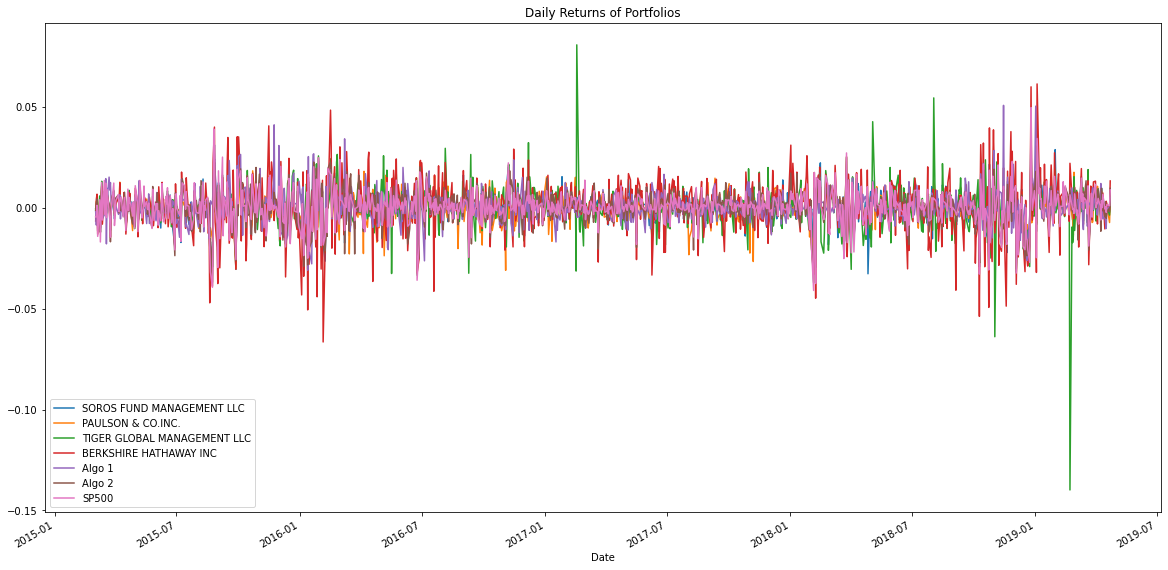

In [41]:
# Plot daily returns
combined_daily_returns.plot(figsize=(20,10), title="Daily Returns of Portfolios")

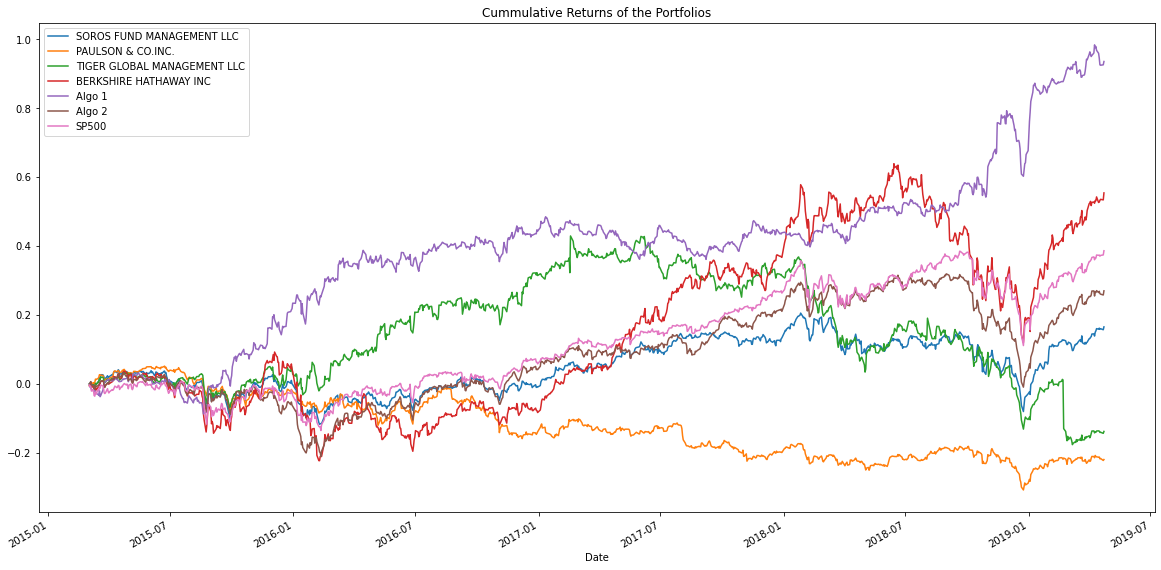

In [42]:
# Plot cumulative returns
cumulative_returns = (1 + combined_daily_returns).cumprod() - 1
cumulative_returns.plot(figsize=(20,10), title="Cummulative Returns of the Portfolios")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

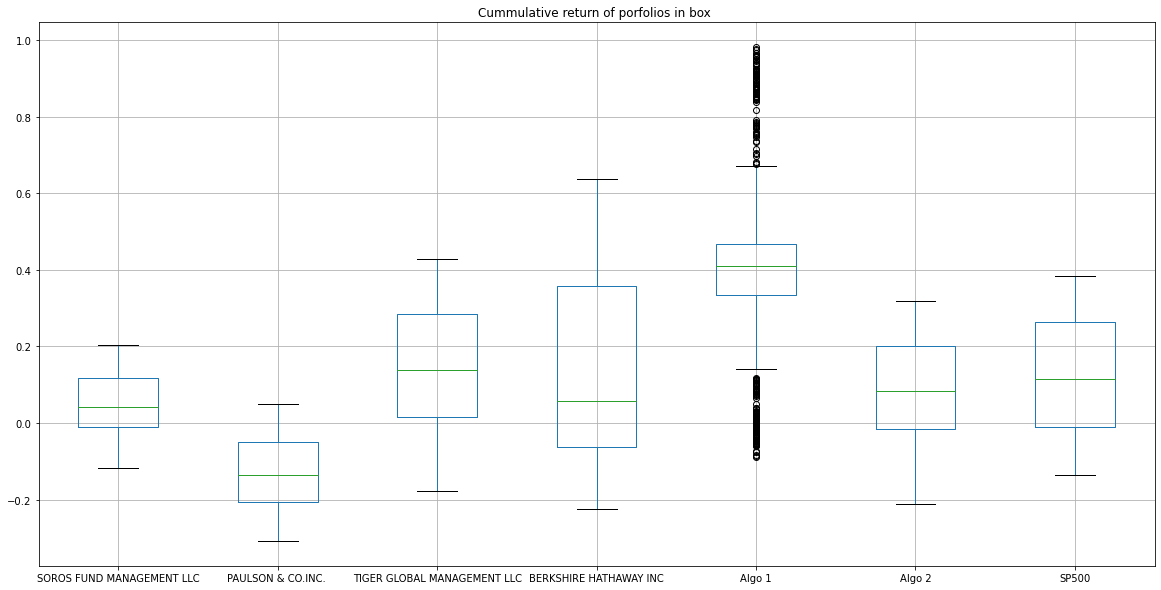

In [43]:
# Box plot to visually show risk
cumulative_returns.plot.box(figsize=(20,10), grid=True, title="Cummulative return of porfolios in box " )

In [44]:
# Daily Standard Deviations
all_portfolio_std = combined_daily_returns.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

In [45]:
# Determine which portfolios are riskier than the S&P 500
all_portfolio_std = all_portfolio_std.sort_values(ascending=False)
all_portfolio_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [46]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = all_portfolio_standard_deviation * np.sqrt(252)
annual_std

NameError: name 'all_portfolio_standard_deviation' is not defined

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

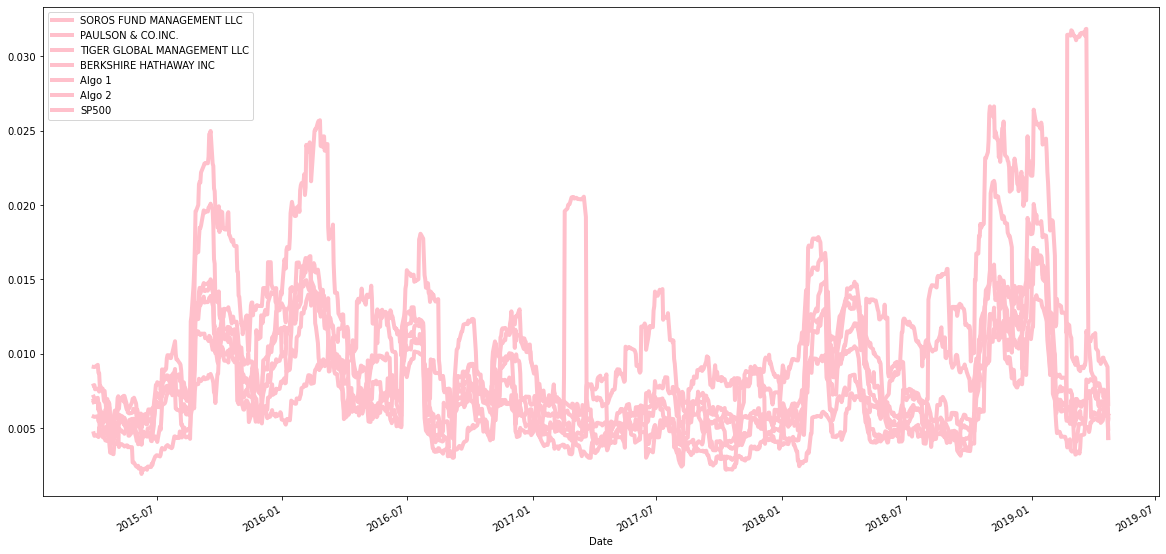

In [47]:
# Calculate and plot the rolling standard deviation for 21 days
axis = combined_daily_returns.rolling(window=21).std().plot(figsize=(20,10),lw=4, color="pink")

In [48]:
# Construct a correlation table
returns_correlations = combined_daily_returns.corr()
returns_correlations

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [49]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
algo1_covariance = combined_daily_returns['Algo 1'].cov(combined_daily_returns['SP500'])
sp_variance = combined_daily_returns['SP500'].var()
algo1_beta = algo1_covariance / sp_variance
algo1_beta

0.24899091459425748

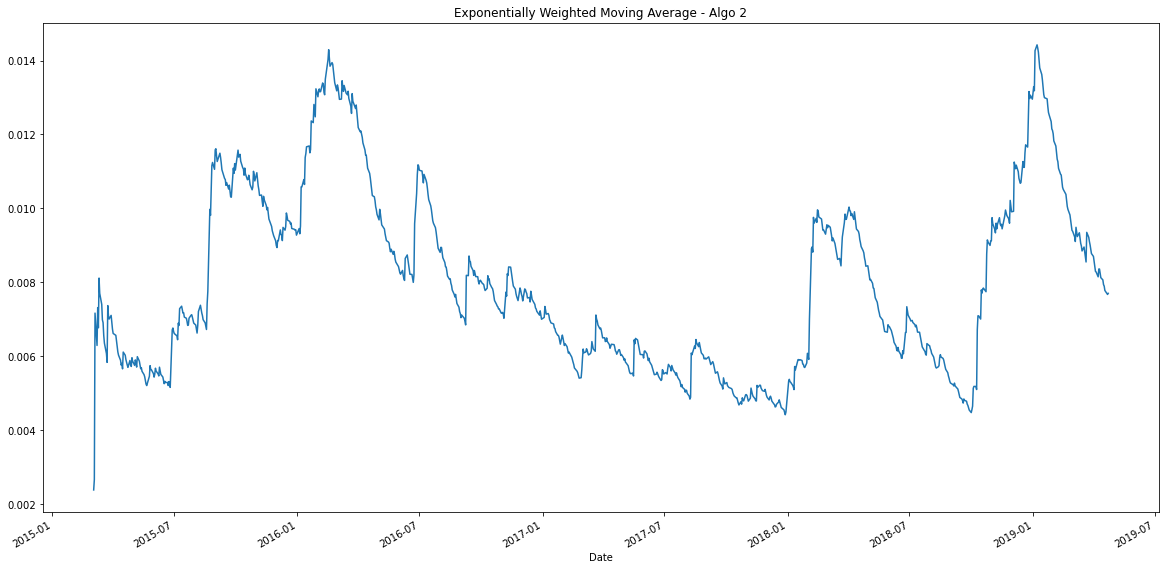

In [50]:
# Calculate a rolling window using the exponentially weighted moving average. 
combined_daily_returns['Algo 2'].ewm(halflife=21).std().plot(figsize=(20,10), title="Exponentially Weighted Moving Average - Algo 2")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [51]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_daily_returns.mean() * 252) / (combined_daily_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending = False)

Algo 1                         1.378648
SP500                          0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

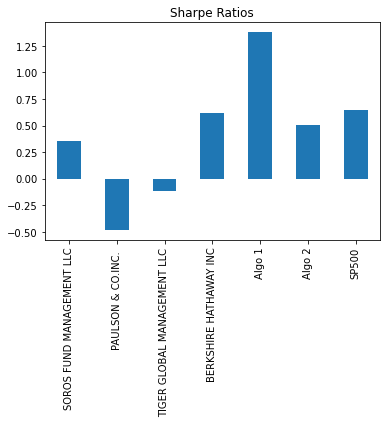

In [52]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [83]:
# Read the first stock
snap_path = Path("Resources/Snap_historical.csv")
snap_sp = pd.read_csv(snap_path, index_col="Date", parse_dates=True)
snap_sp["Symbol"] = "SNAP"
snap_sp.head()

,Close,Symbol
Date,,
2018-02-01 16:00:00,13.92,SNAP
2018-02-02 16:00:00,13.71,SNAP
2018-02-05 16:00:00,13.85,SNAP
2018-02-06 16:00:00,14.06,SNAP
2018-02-07 16:00:00,20.75,SNAP


In [84]:
# Read the second stock
twtr_path = Path("Resources/twitter_historical(2).csv")
twtr_sp = pd.read_csv(twtr_path, index_col="Date", parse_dates=True)
twtr_sp["Symbol"] = "TWTR"
twtr_sp.head()

,Close,Symbol
Date,,
2018-02-12 16:00:00,176.41,TWTR
2018-02-13 16:00:00,173.15,TWTR
2018-02-14 16:00:00,179.52,TWTR
2018-02-15 16:00:00,179.96,TWTR
2018-02-16 16:00:00,177.36,TWTR


In [55]:
# Read the third stock
fb_path = Path("Resources/facebook_historical.csv")
fb_sp = pd.read_csv(fb_path, index_col="Date", parse_dates=True)
fb_sp["Symbol"] = "FB"
fb_sp.head()

,Close,Symbol
Date,,
2019-09-30 16:00:00,178.08,FB
2019-10-01 16:00:00,175.81,FB
2019-10-02 16:00:00,174.60,FB
2019-10-03 16:00:00,179.38,FB
2019-10-04 16:00:00,180.45,FB


In [85]:
# Concatenate all stocks into a single DataFrame
ale_portfolio = pd.concat([snap_sp, twtr_sp, fb_sp],axis="columns",join="inner")
ale_portfolio = ale_portfolio.drop(columns=['Symbol'])
ale_portfolio.columns = ['SNAP', 'TWTR', 'FB']
ale_portfolio.sort_index(inplace=True)
ale_portfolio.head()

,SNAP,TWTR,FB
Date,,,
2019-09-30 16:00:00,15.80,178.08,178.08
2019-10-01 16:00:00,15.52,175.81,175.81
2019-10-02 16:00:00,14.80,174.60,174.60
2019-10-03 16:00:00,14.30,179.38,179.38
2019-10-04 16:00:00,14.52,180.45,180.45


In [86]:
ale_portfolio.head()

,SNAP,TWTR,FB
Date,,,
2019-09-30 16:00:00,15.80,178.08,178.08
2019-10-01 16:00:00,15.52,175.81,175.81
2019-10-02 16:00:00,14.80,174.60,174.60
2019-10-03 16:00:00,14.30,179.38,179.38
2019-10-04 16:00:00,14.52,180.45,180.45


In [87]:
daily_returns = ale_portfolio.pct_change()
daily_returns

,SNAP,TWTR,FB
Date,,,
2019-09-30 16:00:00,NaN,NaN,NaN
2019-10-01 16:00:00,-0.017722,-0.012747,-0.012747
2019-10-02 16:00:00,-0.046392,-0.006882,-0.006882
2019-10-03 16:00:00,-0.033784,0.027377,0.027377
2019-10-04 16:00:00,0.015385,0.005965,0.005965
...,...,...,...
2020-09-23 16:00:00,-0.003926,-0.022493,-0.022493
2020-09-24 16:00:00,-0.041387,0.002048,0.002048
2020-09-25 16:00:00,0.015214,0.021200,0.021200


In [88]:
#Drop nulls
ale_portfolio=daily_returns.dropna()
daily_returns.isnull().sum()

SNAP    1
TWTR    1
FB      1
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [89]:
# Calculate weighted portfolio returns
weights = [.33, .33, .33]
#YOUR CODE
ale_portfolio = daily_returns.dot(weights)
ale_portfolio.head()

Date
2019-09-30 16:00:00         NaN
2019-10-01 16:00:00   -0.014261
2019-10-02 16:00:00   -0.019852
2019-10-03 16:00:00    0.006920
2019-10-04 16:00:00    0.009014
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [104]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
all_pf_returns = pd.concat([ale_portfolio, combined_daily_returns], axis="columns", join="inner")
x = all_pf_returns.columns[-1]
all_pf_returns = all_pf_returns.rename(columns={x:"Custom"})
all_pf_returns.columns
all_pf_returns.head()

,SNAP,TWTR,FB,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Custom
Date,,,,,,,,,,


In [91]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_pf_returns.dropna(inplace=True)
all_pf_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
Custom                         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

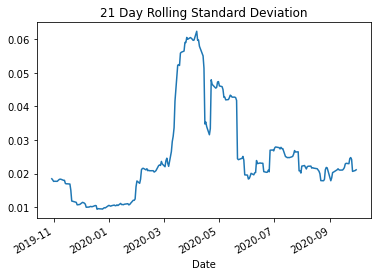

In [94]:
# Risk
all_pf_returns = ale_portfolio.rolling(window = 21).std().plot(title = '21 Day Rolling Standard Deviation')

In [ ]:
# Rolling
# YOUR CODE HERE

In [101]:
# Annualized Sharpe Ratios
combined_sharpe_ratios = (combined_daily_returns.mean() * 252) / (combined_daily_returns.std() * np.sqrt(252))
combined_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

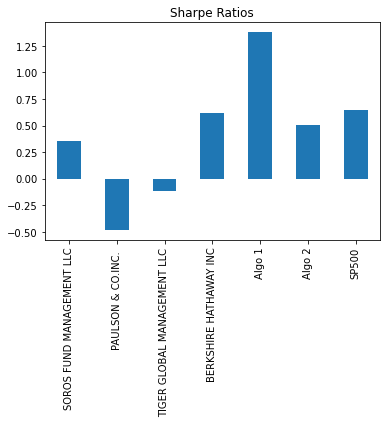

In [102]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot(kind = 'bar', title = "Sharpe Ratios")

In [80]:
# Create a correlation analysis
# YOUR CODE HERE

In [81]:
# Beta
# YOUR CODE HERE